In [1]:
%cd ../

/home/dmoreno/pipeline_v4_final/pipeline/training/stamp_classifier/data_acquisition/rubin


In [2]:
import pandas as pd

In [3]:
partitions = pd.read_parquet('./data/processed/partitions/ts_stamps_v0.0.1_comm_4candmax/partitions.parquet')
partitions

,oid,measurement_id,class,partition
0,169342396191473695,169342396191473695,bogus,test
1,169368782898724931,169368782898724931,bogus,test
2,169342395536637953,169342395536637953,bogus,test
3,169368775765786680,169368775765786680,bogus,test
4,169342395524579357,169342395524579357,bogus,test
...,...,...,...,...
17341,169368789303427238,169368789303427238,bogus,validation_4
17342,169364393126002771,169364393126002771,VS,validation_4
17343,169359997910646834,169359997910646834,bogus,validation_4
17344,169364390589497368,169364390589497368,bogus,validation_4


In [4]:
# Filtrar los datos de test y convertirlos en un diccionario
ids_test_new_tax = set(partitions[partitions["partition"] == "test"].oid.values)
print(f'Test {len(ids_test_new_tax)}')

# Calcular las proporciones de train y val en cada fold
num_folds = 5 
for fold in range(num_folds):
    num_ids_train = partitions[partitions.partition == f'training_{fold}'].shape[0]
    num_ids_val = partitions[partitions.partition == f'validation_{fold}'].shape[0]
    total = num_ids_train + num_ids_val

    print(f'Fold {fold}: train {num_ids_train} ({(num_ids_train/total) * 100 :.1f}%) - val {num_ids_val} ({(num_ids_val/total) * 100:.1f} %)')

Test 826
Fold 0: train 2643 (80.0%) - val 661 (20.0 %)
Fold 1: train 2643 (80.0%) - val 661 (20.0 %)
Fold 2: train 2643 (80.0%) - val 661 (20.0 %)
Fold 3: train 2643 (80.0%) - val 661 (20.0 %)
Fold 4: train 2644 (80.0%) - val 660 (20.0 %)


In [5]:
counts = partitions.groupby(['partition', 'class']).size().reset_index(name='count')
counts.head(50)

,partition,class,count
0,test,AGN,88
1,test,SN,7
2,test,VS,125
3,test,asteroid,200
4,test,bogus,400
5,test,satellite,6
6,training_0,AGN,280
7,training_0,SN,23
8,training_0,VS,400
9,training_0,asteroid,640


In [6]:
class_counts = counts[
    (counts['partition'] == 'training_0') |
    (counts['partition'] == 'validation_0') |
    (counts['partition'] == 'test')
    ]

class_counts = class_counts.groupby('class')['count'].sum().reset_index()
class_counts

,class,count
0,AGN,439
1,SN,35
2,VS,625
3,asteroid,1000
4,bogus,2000
5,satellite,31


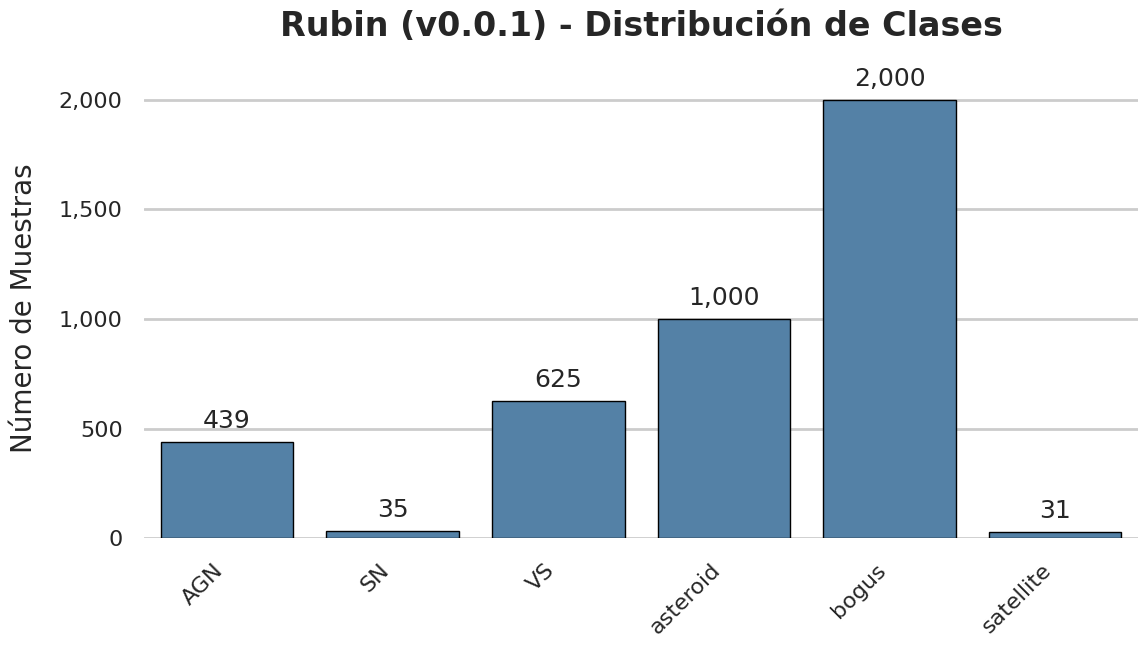

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 2. Establecer un tema y un CONTEXTO para textos grandes
sns.set_theme(style="whitegrid")
sns.set_context("poster") # ¡ESTE ES EL CAMBIO CLAVE! Escala todo para que sea más grande.

# 3. Aumentar el tamaño de la figura para que el texto grande quepa bien
plt.figure(figsize=(12, 7)) # Más grande que antes

# 4. Crear el gráfico de barras (sin cambios aquí)
ax = sns.barplot(
    x='class', 
    y='count', 
    data=class_counts, 
    #palette='crest_r',
    color='#4682B4',
    edgecolor='black',
    linewidth=1
)

# 5. Ajustar títulos y etiquetas con tamaños de fuente explícitos y más grandes
ax.set_title('Rubin (v0.0.1) - Distribución de Clases', fontsize=24, weight='bold', pad=30)
ax.set_xlabel('')
ax.set_ylabel('Número de Muestras', fontsize=20, labelpad=15)

# 6. Formatear el eje Y
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# 7. Aumentar el tamaño de los "ticks" (las etiquetas en los ejes)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# 8. Aumentar el tamaño de los valores sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                size=18, # Tamaño de la anotación aumentado
                xytext=(0, 15), # Aumentamos el offset para que no se pegue a la barra
                textcoords='offset points')

# 9. Limpiar el gráfico
sns.despine(left=True, bottom=True)

# 10. Ajustar y mostrar
plt.tight_layout()
plt.show()

In [8]:
partitions = pd.read_parquet('./data/processed/partitions/ts_stamps_v0.0.4_dp1/partitions.parquet')
partitions

,diaObjectId,diaSourceId,class,partition
0,628760465987600423,600425736871346826,VS,test
1,611255003922825940,600320190600183907,AGN,test
2,650018836115882038,600386155389124609,asteroid,test
3,592915218690998602,600359786038427673,SN,test
4,648367644528869531,600386157807140919,asteroid,test
...,...,...,...,...
24235,604062754768160203,600390560818659484,VS,validation_4
24236,592915356129952775,600416938765058728,bogus,validation_4
24237,648375547268694077,600386155389124652,asteroid,validation_4
24238,614429019114315195,600430118274859452,bogus,validation_4


In [9]:
# Filtrar los datos de test y convertirlos en un diccionario
ids_test_new_tax = set(partitions[partitions["partition"] == "test"].diaObjectId.values)
print(f'Test {len(ids_test_new_tax)}')

# Calcular las proporciones de train y val en cada fold
num_folds = 5 
for fold in range(num_folds):
    num_ids_train = partitions[partitions.partition == f'training_{fold}'].shape[0]
    num_ids_val = partitions[partitions.partition == f'validation_{fold}'].shape[0]
    total = num_ids_train + num_ids_val

    print(f'Fold {fold}: train {num_ids_train} ({(num_ids_train/total) * 100 :.1f}%) - val {num_ids_val} ({(num_ids_val/total) * 100:.1f} %)')

Test 1155
Fold 0: train 3693 (80.0%) - val 924 (20.0 %)
Fold 1: train 3693 (80.0%) - val 924 (20.0 %)
Fold 2: train 3694 (80.0%) - val 923 (20.0 %)
Fold 3: train 3694 (80.0%) - val 923 (20.0 %)
Fold 4: train 3694 (80.0%) - val 923 (20.0 %)


In [10]:
counts = partitions.groupby(['partition', 'class']).size().reset_index(name='count')
counts.head(50)

,partition,class,count
0,test,AGN,52
1,test,SN,9
2,test,VS,454
3,test,asteroid,200
4,test,bogus,400
5,test,satellite,40
6,training_0,AGN,164
7,training_0,SN,29
8,training_0,VS,1452
9,training_0,asteroid,640


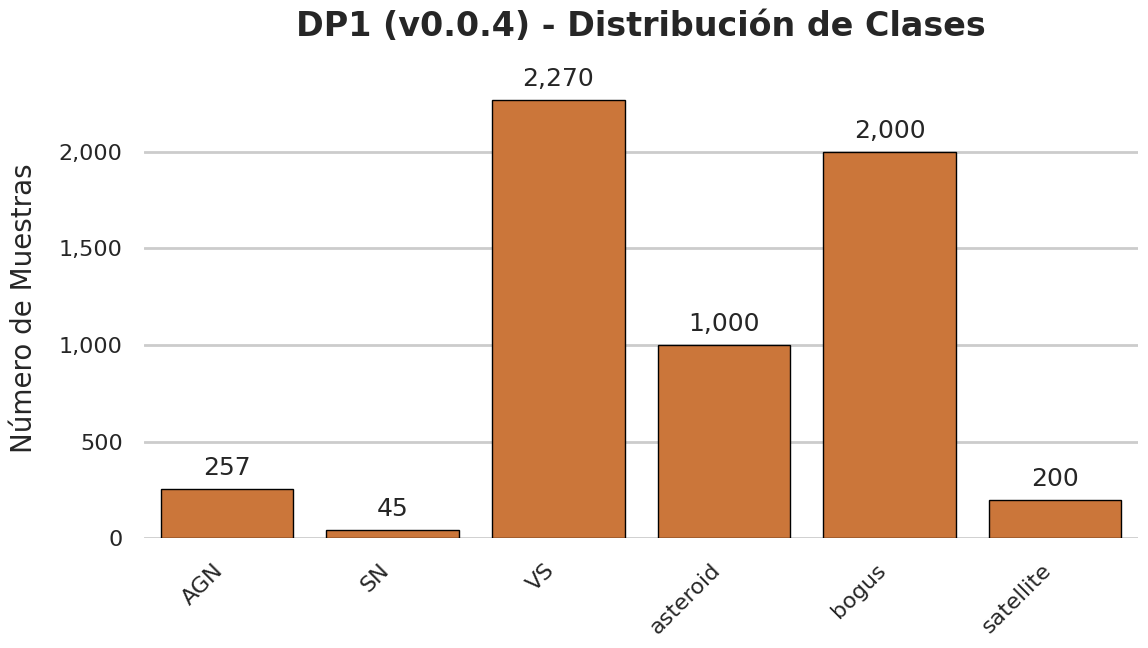

In [11]:
class_counts = counts[
    (counts['partition'] == 'training_0') |
    (counts['partition'] == 'validation_0') |
    (counts['partition'] == 'test')
    ]

class_counts = class_counts.groupby('class')['count'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 2. Establecer un tema y un CONTEXTO para textos grandes
sns.set_theme(style="whitegrid")
sns.set_context("poster") # ¡ESTE ES EL CAMBIO CLAVE! Escala todo para que sea más grande.

# 3. Aumentar el tamaño de la figura para que el texto grande quepa bien
plt.figure(figsize=(12, 7)) # Más grande que antes

# 4. Crear el gráfico de barras (sin cambios aquí)
ax = sns.barplot(
    x='class', 
    y='count', 
    data=class_counts, 
    #palette='crest_r',
    color='#E37222',
    edgecolor='black',
    linewidth=1
)

# 5. Ajustar títulos y etiquetas con tamaños de fuente explícitos y más grandes
ax.set_title('DP1 (v0.0.4) - Distribución de Clases', fontsize=24, weight='bold', pad=30)
ax.set_xlabel('')
ax.set_ylabel('Número de Muestras', fontsize=20, labelpad=15)

# 6. Formatear el eje Y
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# 7. Aumentar el tamaño de los "ticks" (las etiquetas en los ejes)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# 8. Aumentar el tamaño de los valores sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                size=18, # Tamaño de la anotación aumentado
                xytext=(0, 15), # Aumentamos el offset para que no se pegue a la barra
                textcoords='offset points')

# 9. Limpiar el gráfico
sns.despine(left=True, bottom=True)

# 10. Ajustar y mostrar
plt.tight_layout()
plt.show()

In [12]:
partitions = pd.read_parquet('./data/processed/partitions/ztf_as_rubin_v0.0/partitions.parquet').replace({'class': {'vs': 'VS', 'agn': 'AGN', 'sn': 'SN'}})
partitions

,oid,candid,class,partition
0,ZTF19acqylbl,1042294173415010007,bogus,test
1,ZTF20abizinn,1274389583415015100,bogus,test
2,ZTF21aaqujly,1546359405915015006,satellite,test
3,ZTF19acrxgdb,1045525383715010011,bogus,test
4,ZTF19aastdrh,848142891115010028,VS,test
...,...,...,...,...
206341,ZTF18abpyiss,616426752115010191,VS,validation_4
206342,ZTF18acyuryq,1159167435315010005,VS,validation_4
206343,ZTF18acsmkjx,701326525515015010,asteroid,validation_4
206344,ZTF18aajrzvj,1560457293815010011,AGN,validation_4


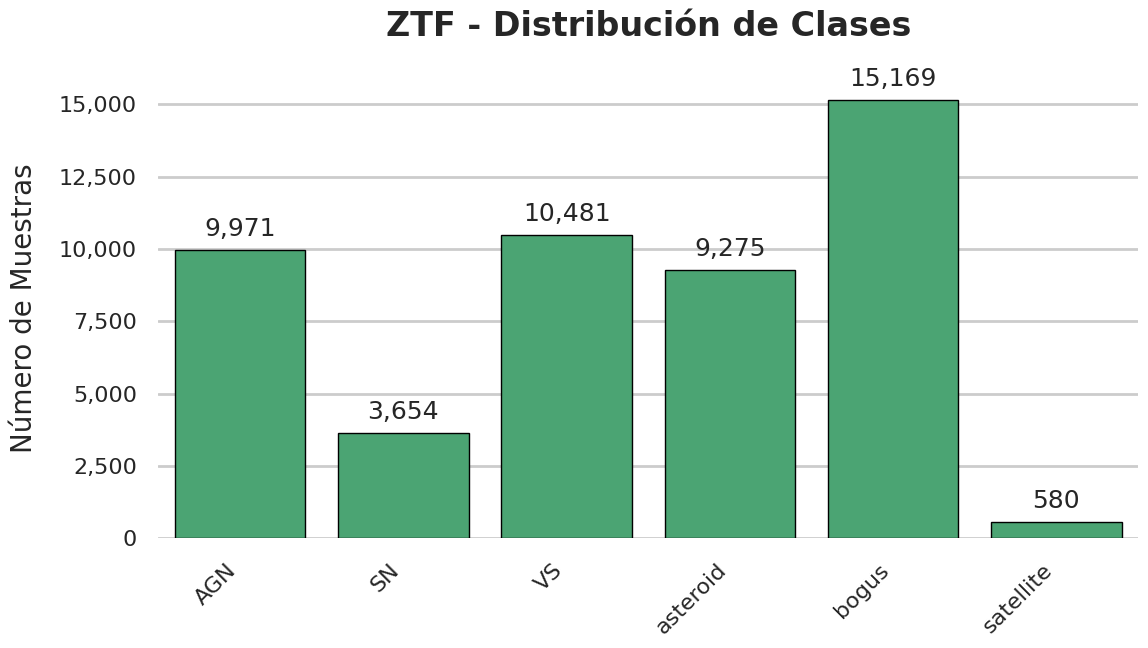

In [13]:
counts = partitions.groupby(['partition', 'class']).size().reset_index(name='count')

class_counts = counts[
    (counts['partition'] == 'training_0') |
    (counts['partition'] == 'validation_0') |
    (counts['partition'] == 'test')
    ]

class_counts = class_counts.groupby('class')['count'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 2. Establecer un tema y un CONTEXTO para textos grandes
sns.set_theme(style="whitegrid")
sns.set_context("poster") # ¡ESTE ES EL CAMBIO CLAVE! Escala todo para que sea más grande.

# 3. Aumentar el tamaño de la figura para que el texto grande quepa bien
plt.figure(figsize=(12, 7)) # Más grande que antes

# 4. Crear el gráfico de barras (sin cambios aquí)
ax = sns.barplot(
    x='class', 
    y='count', 
    data=class_counts, 
    #palette='crest_r',
    color='#3CB371',
    edgecolor='black',
    linewidth=1
)

# 5. Ajustar títulos y etiquetas con tamaños de fuente explícitos y más grandes
ax.set_title('ZTF - Distribución de Clases', fontsize=24, weight='bold', pad=30)
ax.set_xlabel('')
ax.set_ylabel('Número de Muestras', fontsize=20, labelpad=15)

# 6. Formatear el eje Y
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# 7. Aumentar el tamaño de los "ticks" (las etiquetas en los ejes)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# 8. Aumentar el tamaño de los valores sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                size=18, # Tamaño de la anotación aumentado
                xytext=(0, 15), # Aumentamos el offset para que no se pegue a la barra
                textcoords='offset points')

# 9. Limpiar el gráfico
sns.despine(left=True, bottom=True)

# 10. Ajustar y mostrar
plt.tight_layout()
plt.show()